# Import Stuff

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import plotly
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import csv as csv

import talib

Using TensorFlow backend.
c:\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
print(talib.__version__)

0.4.16


In [20]:
def dateParser(x):
	return datetime.strptime(x,'%Y%m%d')

In [21]:
btc = pd.read_csv('bitcoinprices.txt', names=['Time', 'Price'])
btc.columns = ["Time","Price"]
sent = pd.read_csv('sentiment6.txt', names=['Time', 'Sentiment'])
sent.columns = ["Time","Sentiment"]
merged = sent.merge(btc, left_index=False, right_index=False, how="inner")
merged.to_csv('merged_data.csv')

data = pd.read_csv("merged_data.csv", index_col=False)

with open('merged_data.csv', 'r') as f_input, open('output.csv', 'w') as f_output:
    csv_output = csv.writer(f_output, delimiter = ',')

    for row in csv.reader(f_input, delimiter = ','):
        if row[2] != 'None' and row[3] != 'None':
            csv_output.writerow(row)
            
            
data = pd.read_csv("output.csv", index_col=False, parse_dates=['Time'], date_parser=dateParser)

data[0:3]

,Unnamed: 0,Time,Sentiment,Price
0,0,2018-02-23,0.296954,10370.0
1,1,2018-02-22,0.296954,9847.6
2,2,2018-02-21,0.296954,10595.5


In [22]:
plotly.__version__

'2.3.0'

In [26]:
#talib.SMA(numpy.asarray(f['Close']), 20)
data['Sma20'] = talib.SMA(np.asarray(data['Price']), 20)
data['Sma5'] = talib.SMA(np.asarray(data['Price']), 5)


In [29]:
# Make plotly work with Jupyter notebook using the plotly.js CDN
py.init_notebook_mode(connected=True)

#btc_trace = go.Scatter(x=data['Time'], y=data['Price'], name= 'Price')
btc_trace = go.Scatter(x=data['Time'], y=data['Price'], name= 'Price')
btc_trace_sma20 = go.Scatter(x=data['Time'], y=data['Sma20'], name= 'Price_sma20')
btc_trace_sma5 = go.Scatter(x=data['Time'], y=data['Sma5'], name= 'Price_sma5')
py.iplot([btc_trace, btc_trace_sma20, btc_trace_sma5])

In [30]:
sent_trace = go.Scatter(x=data['Time'], y=data['Sentiment'], name= 'Sentiment')
py.iplot([sent_trace])

In [31]:
data[0:3]

,Unnamed: 0,Time,Sentiment,Price,Sma20,Sma5
0,0,2018-02-23,0.296954,10370.0,NaN,NaN
1,1,2018-02-22,0.296954,9847.6,NaN,NaN
2,2,2018-02-21,0.296954,10595.5,NaN,NaN


In [32]:
datag = data[['Price','Sentiment']].groupby(data['Time']).mean()
datag[0:3]

,Price,Sentiment
Time,,
2016-05-08,459.8,0.298202
2016-05-09,462.0,0.298202
2016-05-10,455.2,0.298202


## Training a simple random model:

In [73]:
from sklearn.preprocessing import MinMaxScaler
values = datag['Price'].values.reshape(-1,1)
sentiment = datag['Sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [74]:
sentiment[0:3]

array([[ 0.29820159],
       [ 0.29820159],
       [ 0.29820159]], dtype=float32)

In [75]:
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [76]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

459 197


In [77]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    Tracer()()
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

### with lookback = 1 (kind of unigram)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

c:\python35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

`Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`



> <ipython-input-77-1bef0fd8f3da>(3)create_dataset()
      1 def create_dataset(dataset, look_back, sentiment, sent=False):
      2     Tracer()()
----> 3     dataX, dataY = [], []
      4     for i in range(len(dataset) - look_back):
      5         if i >= look_back:

ipdb> n
> <ipython-input-77-1bef0fd8f3da>(4)create_dataset()
      2     Tracer()()
      3     dataX, dataY = [], []
----> 4     for i in range(len(dataset) - look_back):
      5         if i >= look_back:
      6             a = dataset[i-look_back:i+1, 0]

ipdb> look_back
1
ipdb> n
> <ipython-input-77-1bef0fd8f3da>(5)create_dataset()
      3     dataX, dataY = [], []
      4     for i in range(len(dataset) - look_back):
----> 5         if i >= look_back:
      6             a = dataset[i-look_back:i+1, 0]
      7             a = a.tolist()

ipdb> len(dataset) - look_back
458
ipdb> len(dataset)
459


In [21]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

<IPython.core.display.Javascript object>


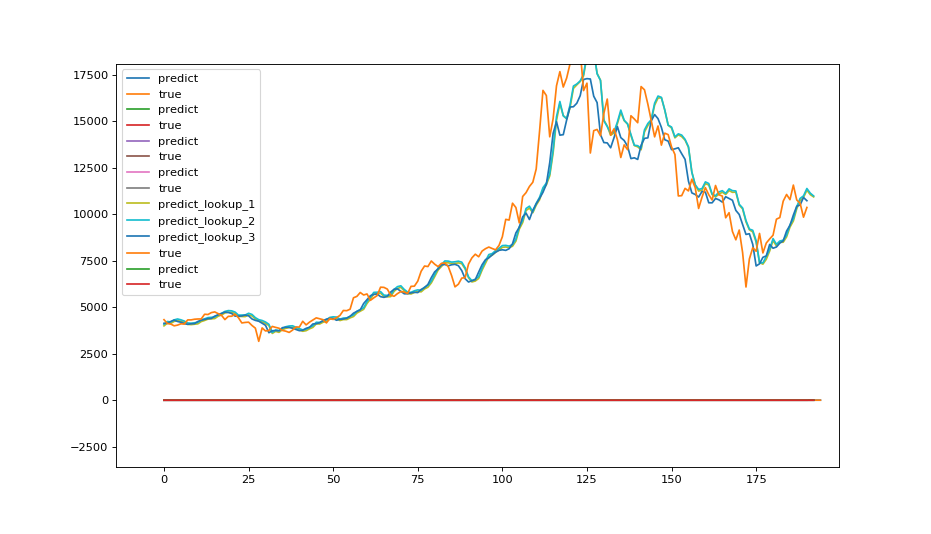

In [23]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [32]:
yhat_inverse_1 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [33]:
rmse_1 = sqrt(mean_squared_error(testY_inverse_1, yhat_inverse_1))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 1030.664


In [34]:
model_1 = model

### with lookback = 2(kind of biram)

In [35]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [36]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [37]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [38]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [39]:
yhat_inverse_2 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [40]:
rmse_2 = sqrt(mean_squared_error(testY_inverse_2, yhat_inverse_2))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 1017.205


In [41]:
model2 = model

## With lookback = 3

In [42]:
look_back = 3
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [43]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [44]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [45]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [46]:
yhat_inverse_3 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [47]:
rmse_3 = sqrt(mean_squared_error(testY_inverse_3, yhat_inverse_3))
print('Test RMSE: %.3f' % rmse_3)

Test RMSE: 1263.808


In [48]:
model3 = model

## Plotting different lookups

In [49]:
pyplot.plot(yhat_inverse_1, label='predict_lookup_1')
pyplot.plot(yhat_inverse_2, label='predict_lookup_2')
pyplot.plot(yhat_inverse_3, label='predict_lookup_3')
pyplot.plot(testY_inverse_3, label='true')
pyplot.legend()
pyplot.show()

In [50]:
len(datag.index.values)

656

In [51]:
print(len(train), len(test))

459 197


In [52]:
btc_1_trace = go.Scatter(x=datag.index.values[len(train)-len(yhat_inverse_1):], y=yhat_inverse_1.reshape(len(yhat_inverse_1)), name= 'predict_lookup_1')
btc_2_trace = go.Scatter(x=datag.index.values[len(train)-len(yhat_inverse_2):], y=yhat_inverse_2.reshape(len(yhat_inverse_2)), name= 'predict_lookup_2')
btc_3_trace = go.Scatter(x=datag.index.values[len(train)-len(yhat_inverse_3):], y=yhat_inverse_3.reshape(len(yhat_inverse_3)), name= 'predict_lookup_3')
btc_t_trace = go.Scatter(x=datag.index.values[len(train)-len(yhat_inverse_1):], y=testY_inverse_1.reshape(len(yhat_inverse_1)), name= 'True')
py.iplot([btc_1_trace,btc_2_trace, btc_3_trace, btc_t_trace])

# With sentiment and lookup2

In [53]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)

In [54]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [55]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [56]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [57]:
yhat_inverse_sent = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_sent = scaler.inverse_transform(testY.reshape(-1, 1))

In [58]:
rmse_sent = sqrt(mean_squared_error(testY_inverse_sent, yhat_inverse_sent))
print('Test RMSE: %.3f' % rmse_sent)

Test RMSE: 1015.796


In [59]:
len(yhat)

193

In [60]:
print(len(trainX), len(testX))

455 193


In [61]:
btc_1_trace = go.Scatter(x=datag.index.values[len(trainX)-len(yhat_inverse_sent):][0:500], y=yhat_inverse_sent.reshape(len(yhat_inverse_sent))[0:500], name= 'With_Sentiment')
btc_2_trace = go.Scatter(x=datag.index.values[len(trainX)-len(yhat_inverse_1):][0:500], y=yhat_inverse_1.reshape(len(yhat_inverse_1))[0:500], name= 'No_Sentiment')
btc_3_trace = go.Scatter(x=datag.index.values[len(trainX)-len(testY_inverse_sent):][0:500], y=testY_inverse_sent.reshape(len(testY_inverse_sent))[0:500], name= 'True')
py.iplot([btc_1_trace,btc_2_trace,btc_3_trace])

In [62]:
model_sent = model

## Now go live with the model:

In [95]:
import MySQLdb
#Enter the values for you database connection
dsn_database = "bitcoin"         # e.g. "MySQLdbtest"
#dsn_hostname = "173.194.231.244"      # e.g.: "mydbinstance.xyz.us-east-1.rds.amazonaws.com"
dsn_hostname = "localhost"
dsn_port = 3306                  # e.g. 3306 
dsn_uid = "zhivko"             # e.g. "user1"
dsn_pwd = "Doitman1"              # e.g. "Password123"

In [96]:
conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [97]:
cursor=conn.cursor()
cursor.execute("""SELECT * FROM live_data""")
cursor.fetchone()

(1, datetime.datetime(2018, 2, 18, 0, 0), 234.34, 2342.23)

In [98]:
print ("\nShow me the records:\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)


Show me the records:

((2, datetime.datetime(2018, 2, 18, 0, 0), 234.34, 2342.23),
 (3, datetime.datetime(2018, 2, 18, 0, 0), 234.34, 2342.23))


In [99]:
cursor.execute("""
    INSERT INTO live_data
    (time, 
    price,
    sentiment) 
     values
        (STR_TO_DATE(\'18.2.2018 00:00:00\',\'%d.%m.%Y %H:%i:%s\'),
        2342.23,
        234.34);
    """)

1

In [100]:
conn.commit()

In [101]:
cursor.close()

In [102]:
# develop a real time pipeline

In [103]:
import queue 
import time
import matplotlib

In [104]:
matplotlib.__version__

'2.0.2'

In [105]:
import queue
import matplotlib.pyplot as plt
true_q = queue.Queue()
pred_q = queue.Queue()
'''
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()
plt.ion()
'''

def process_data(in_data):
    out_data = []
    for line in in_data:
        out_data.append(float(line.split(',')[0]))
    return np.array(out_data).reshape(-1,1)
prev = 15000
threshold = 0.5
while True:
    btc = open('live_bitcoin.csv','r')
    sent = open('live_tweet.csv','r')
    bit_data = btc.readlines()
    sent_data = sent.readlines()
    bit_data = process_data(bit_data[len(bit_data)-5:])
    sent_data = process_data(sent_data[len(sent_data)-5:])
    live = scaler.transform(bit_data)
    testX, testY = create_dataset(live, 2, sent_data, sent=True)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    yhat = model.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    true_q.put(bit_data[4])
    pred_q.put(yhat_inverse[0])
    val = 100*((yhat_inverse[0][0] - prev)/prev)
    if val > threshold:
        decision = 'buy'
    elif val <-threshold:
        decision = 'sell'
    else:
        decision = ''
    prev = yhat_inverse[0][0]
    input_string = "INSERT INTO live_data values ({},{},{},'{}','{}');".format(yhat_inverse[0][0],bit_data[0][0],sent_data[4][0],datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S '),decision)
    cursor.execute(input_string)
    conn.commit()
    time.sleep(60)
    '''
    if true_q.qsize() > 9:
        true_q.get()
        pred_q.get()
        ax.clear()
        ax.plot()
        ax.plot(list(true_q.queue),'-',label='True')
        ax.plot(list(pred_q.queue),'--',label='Predict')
        ax.legend()
        fig.canvas.draw()
        time.sleep(60)
    ''' 
        

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [75]:
import datetime
datetime.datetime.now()

datetime.datetime(2017, 12, 13, 21, 49, 54, 337601)